In [199]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for visualization
import matplotlib.pyplot as plt

# Data Overview

The dataset containce test results for 1000 students with information on how they scored on reading, writing and maths, along with key information about the student. 

In [200]:
# import csv
df = pd.read_csv("exams.csv")

# preview data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [201]:
# general info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [202]:
# double check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [203]:
# check for misspellings in object colums
from pandas.api.types import is_string_dtype, is_numeric_dtype

for column in df:
    if is_string_dtype(df[column]):
        print("In column {0} there are {1} unique values: {2}\n".format(column, df[column].nunique(), df[column].unique()))

In column gender there are 2 unique values: ['male' 'female']

In column race/ethnicity there are 5 unique values: ['group A' 'group D' 'group E' 'group B' 'group C']

In column parental level of education there are 6 unique values: ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]

In column lunch there are 2 unique values: ['standard' 'free/reduced']

In column test preparation course there are 2 unique values: ['completed' 'none']



### Key takeaways:
1. Categorical variables: gender, race/etnicity, parental level of education, lunch, test preparation course (all strings)
2. Numerical variables: math score, reading score, writing score (all int64)
3. No missing data among 1000 records
4. Data is clean

# Exploratory Data Analysis (EDA)

## Gender

### General distribution

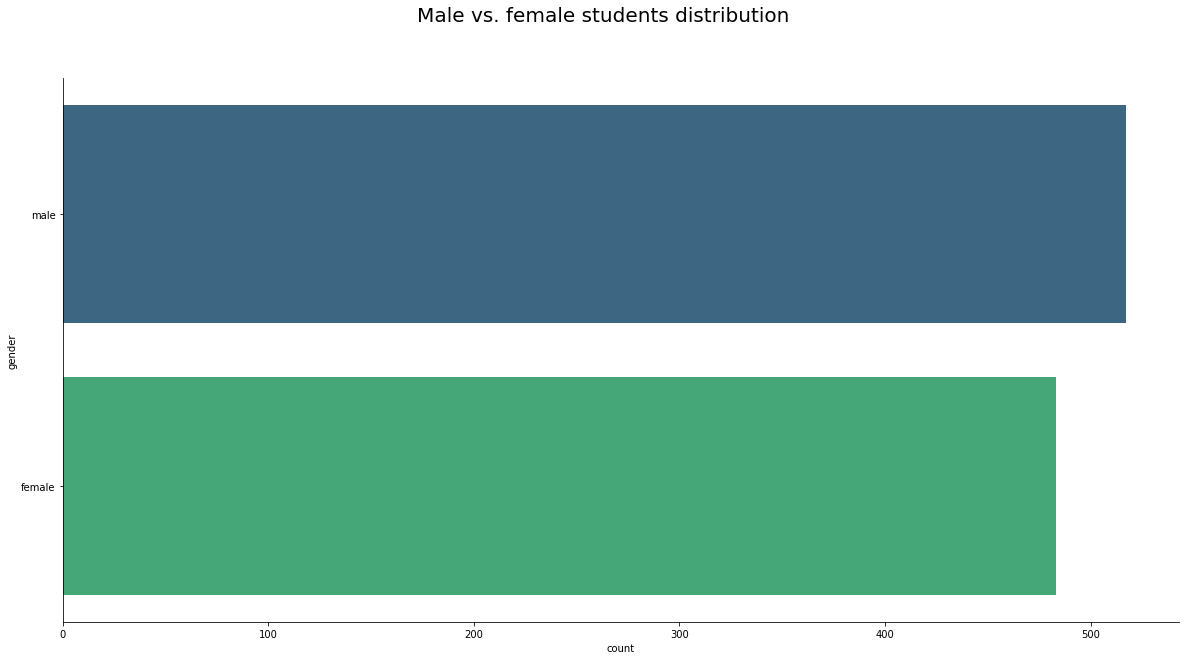

In [204]:
plt.figure(figsize=(20, 10))
sns.countplot(y="gender", data=df, palette="viridis")
sns.despine(top=True, right=True)
plt.suptitle("Male vs. female students distribution", fontsize=20)
plt.show()

In [205]:
mperc = (df[df["gender"]=="male"].shape[0]/df.shape[0])*100
fperc = (df[df["gender"]=="female"].shape[0]/df.shape[0])*100
print(mperc)
print(f"Males: {mperc}%\nFemales: {fperc}%\nDiff (m-f): {mperc-fperc:.2f}%")

51.7
Males: 51.7%
Females: 48.3%
Diff (m-f): 3.40%


The gender balance is relatively even with 3.40% skew in favour of males

### Dependences between test scores and gender

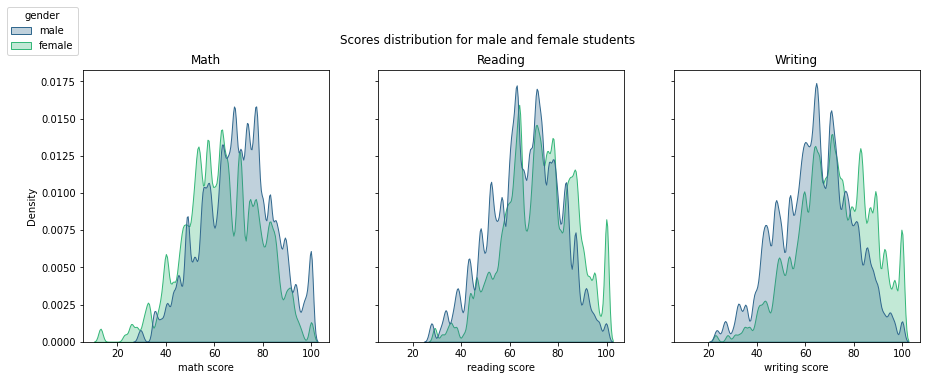

In [206]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True, sharex=True)
fig.suptitle("Scores distribution for male and female students")

subject = [["math score", "Math"], ["reading score", "Reading"], ["writing score", "Writing"]]
for i in range(0, 3):
    sns.kdeplot(ax=axes[i], data=df, x=subject[i][0], hue="gender", bw_adjust=.2, palette="viridis", fill=True, alpha=.3)
    axes[i].set_title(subject[i][1])
    if i == 0:
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    else:
        axes[i].get_legend().remove()
        
sns.move_legend(axes[0], loc='best', bbox_to_anchor=(0,1.25))

As we can see, females outperformed males in exams, although males did better in math exam. This is a trend seen in the wider world as highlighted in the article by [nature.com : Females show more sustained performance during test-taking than males](https://www.nature.com/articles/s41467-019-11691-y#Abs1). 
> Females tend to perform worse than males on math and science tests, but they perform better on verbal reading tests. ... females are better able to sustain their performance during a test across all of these topics, including math and science 

## Race/Ethnicity

The data about race/ethnicity is anonymized and uses group A to E. Group A appears to the minority race with the smallest number of students and group C appearing to be the majority group with over 300 students in this group.

### General distribution

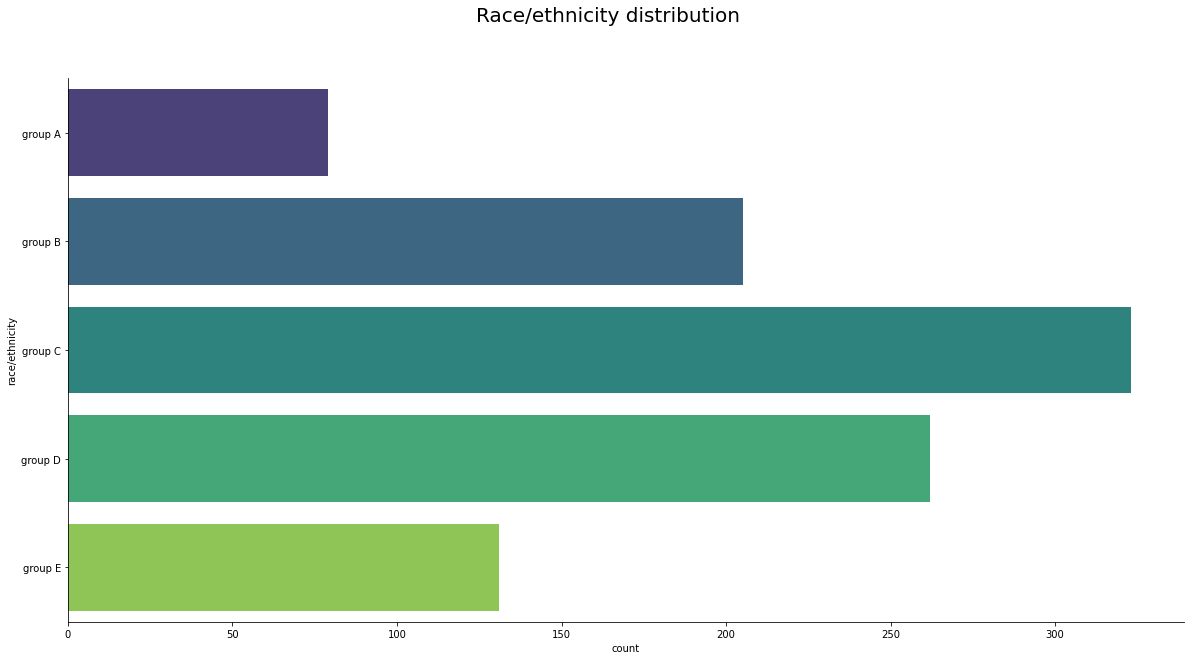

In [207]:
groups_order = ['group A','group B','group C','group D', 'group E',]

plt.figure(figsize=(20, 10))
sns.countplot(y="race/ethnicity", data=df, orient="h", order=groups_order, palette="viridis")
sns.despine(top=True, right=True)
plt.suptitle("Race/ethnicity distribution", fontsize=20)
plt.show()

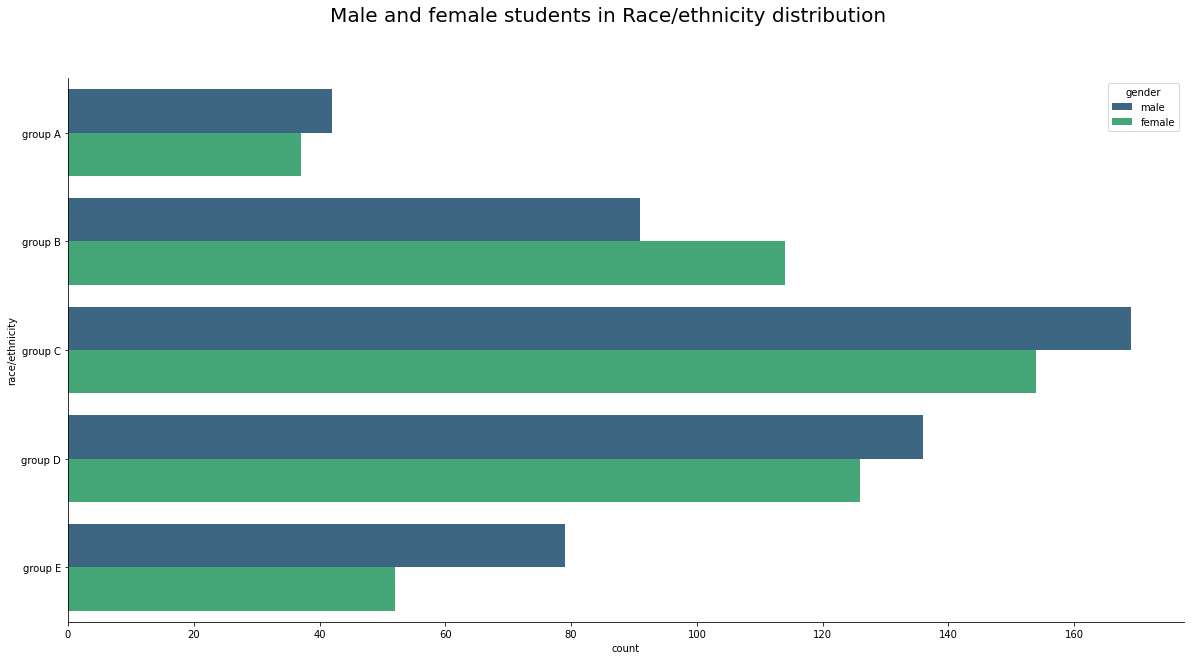

In [208]:
plt.figure(figsize=(20, 10))
sns.countplot(y="race/ethnicity", data=df, hue="gender", order=groups_order, palette="viridis")
sns.despine(top=True, right=True)
plt.suptitle("Male and female students in Race/ethnicity distribution", fontsize=20)
plt.show()

### Distribution of test scores with respect to student's ethnicity 

Text(0.5, 0, 'Scores')

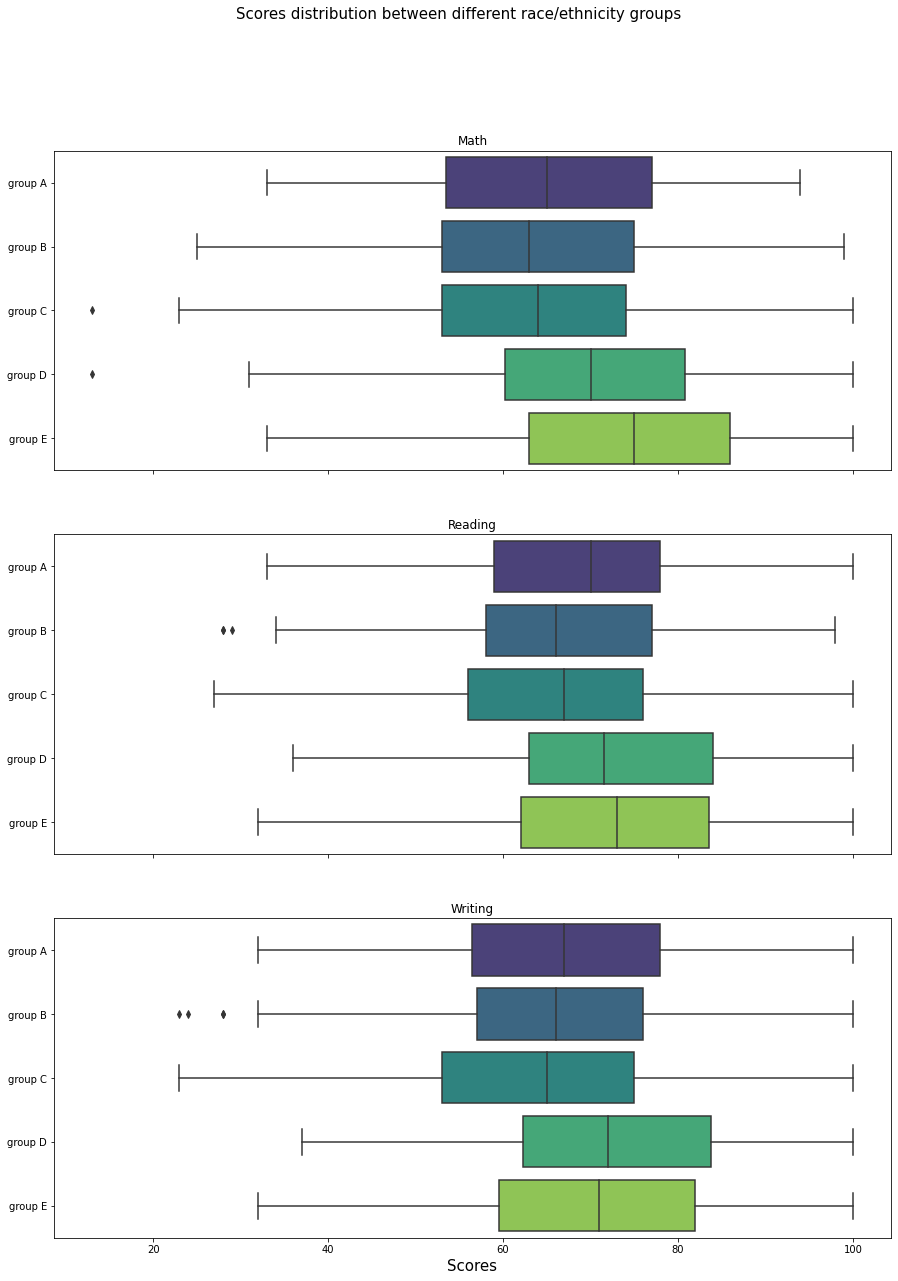

In [209]:
fig, axes = plt.subplots(3, figsize=(15,20), sharey=True, sharex=True)
fig.suptitle("Scores distribution between different race/ethnicity groups", fontsize=15)

subject = [["math score", "Math"], ["reading score", "Reading"], ["writing score", "Writing"]]
for i in range(0, 3):
    sns.boxplot(ax=axes[i], data=df, x=subject[i][0], y="race/ethnicity", palette="viridis", order=groups_order)
    axes[i].set_title(subject[i][1])
    

for ax in axes.flat:
    ax.label_outer()
    ax.set_ylabel('')
    
axes[2].set_xlabel("Scores", fontsize=15)


It appears that specific groups outperformed others. Group B and C appear to particularly scored low. 
This may be due to disadvantages faced by such groups. The dataset does not containe any related information about race/ethinicity and conditions for the tests. There can be social dynamics that may affect the distribution and need to be examined to understand underlying factors related to this distribution.

# Lunch

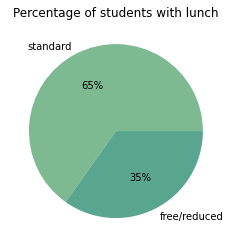

In [210]:
# set vars for pie chart
labels = df["lunch"].value_counts().index
values = df["lunch"].value_counts()
colors = sns.color_palette("crest")

plt.pie(values, labels=labels, colors = colors, autopct='%.0f%%')
plt.title("Percentage of students with lunch")
plt.show()


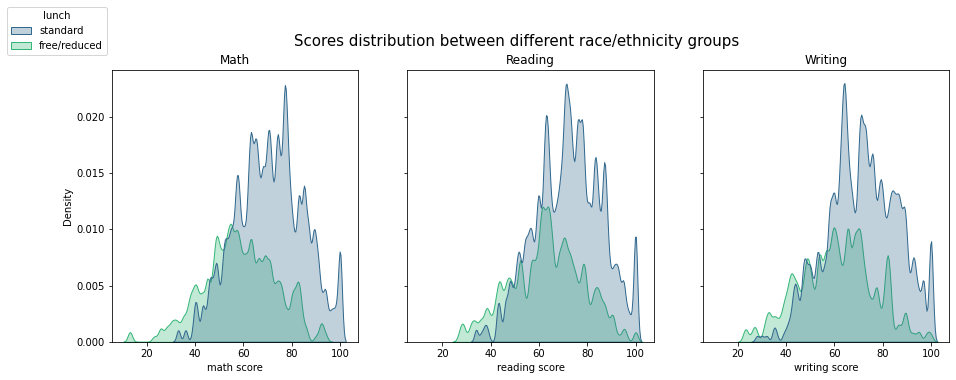

In [211]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
fig.suptitle("Scores distribution between different race/ethnicity groups", fontsize=15)

subject = [["math score", "Math"], ["reading score", "Reading"], ["writing score", "Writing"]]
for i in range(0, 3):
    sns.kdeplot(ax=axes[i], data=df, x=subject[i][0], hue="lunch", bw_adjust=.2, palette="viridis", fill=True, alpha=.3)
    axes[i].set_title(subject[i][1])
    if i == 0:
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    else:
        axes[i].get_legend().remove()
        
sns.move_legend(axes[0], loc='best', bbox_to_anchor=(0,1.25))

This graphic highlights that those who received free or reduced cost lunches achieved lower exam scores.

# Parental level of education

There is significant variation in the level of parental education from limited high school education to master's degree.

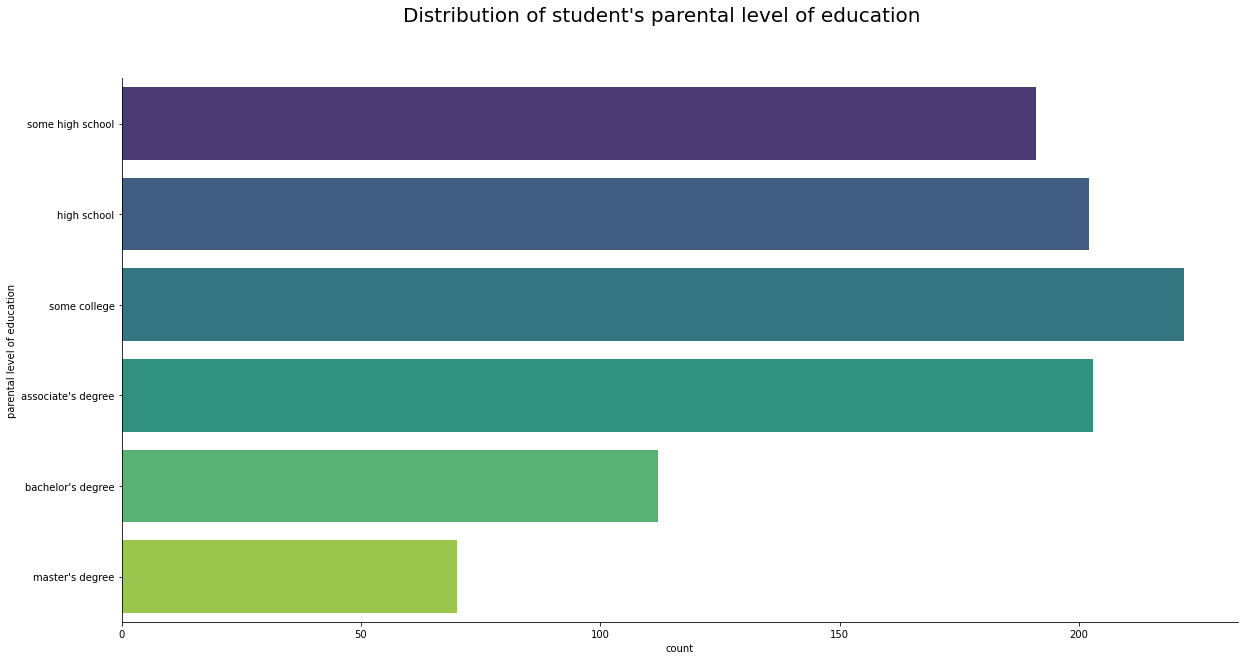

In [212]:
edu_order = ['some high school','high school','some college', "associate's degree", "bachelor's degree", "master's degree"]

plt.figure(figsize=(20, 10))
sns.countplot(y="parental level of education", data=df, order=edu_order, palette="viridis")
sns.despine(top=True, right=True)
plt.suptitle("Distribution of student's parental level of education", fontsize=20)
plt.show()

Text(0.5, 0, 'Scores')

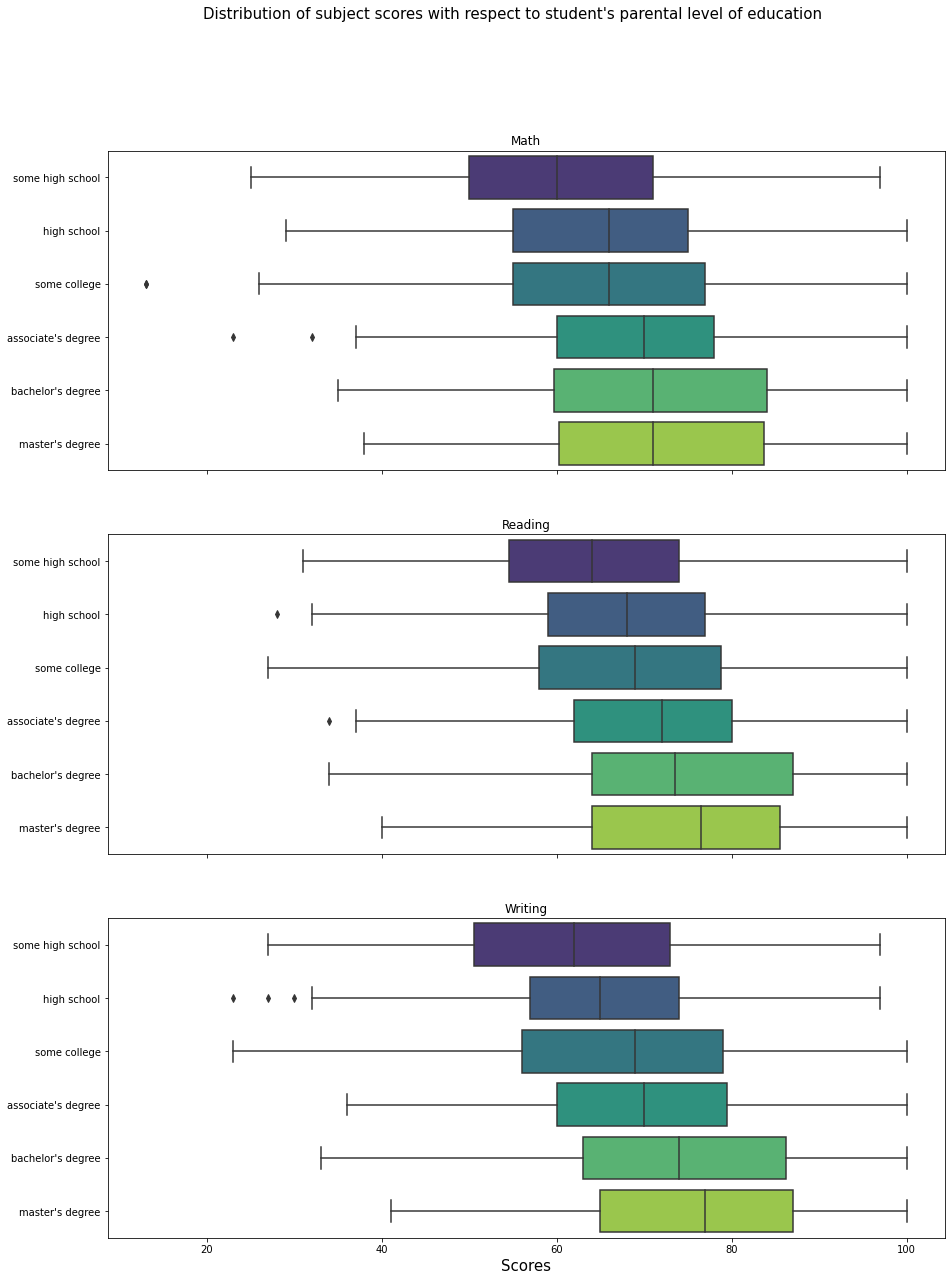

In [213]:
fig, axes = plt.subplots(3, figsize=(15,20), sharey=True, sharex=True)
fig.suptitle("Distribution of subject scores with respect to student's parental level of education", fontsize=15)

subject = [["math score", "Math"], ["reading score", "Reading"], ["writing score", "Writing"]]
for i in range(0, 3):
    sns.boxplot(ax=axes[i], data=df, x=subject[i][0], y="parental level of education", palette="viridis", order=edu_order)
    axes[i].set_title(subject[i][1])
    

for ax in axes.flat:
    ax.label_outer()
    ax.set_ylabel('')
    
axes[2].set_xlabel("Scores", fontsize=15)

Students whose parents did not complete high school education were on average likely to underperform compared to their peers in all three areas of examination. On the other hand students with parents with some college education were likely to have the greatest range of test results.

# Test preparation

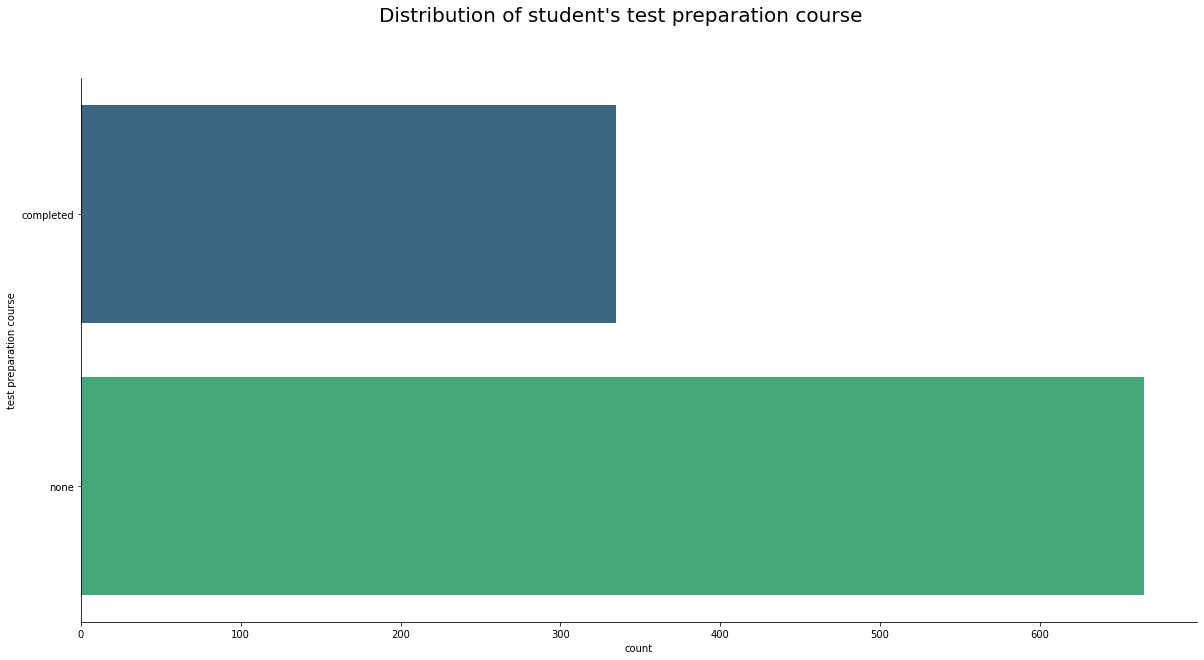

In [214]:
plt.figure(figsize=(20, 10))
sns.countplot(y="test preparation course", data=df, palette="viridis")
sns.despine(top=True, right=True)
plt.suptitle("Distribution of student's test preparation course", fontsize=20)
plt.show()

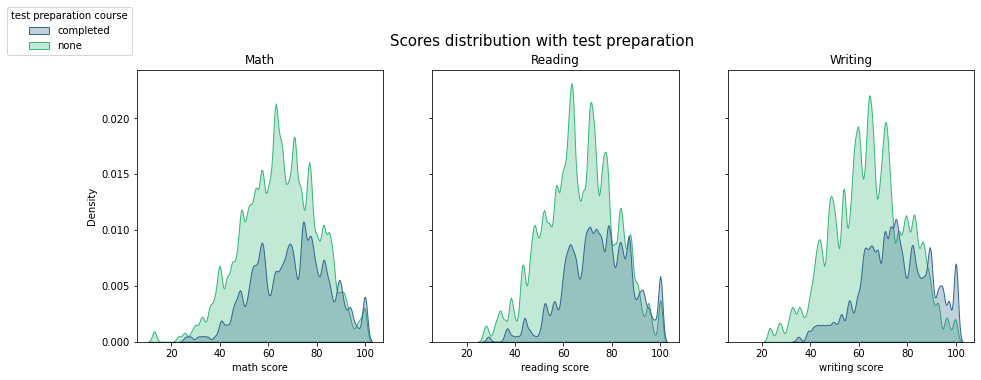

In [215]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
fig.suptitle("Scores distribution with test preparation", fontsize=15)

subject = [["math score", "Math"], ["reading score", "Reading"], ["writing score", "Writing"]]
graph = [0 ,1, 2]
for i in range(0, 3):
    graph[i] = sns.kdeplot(ax=axes[i], data=df, x=subject[i][0], hue="test preparation course", bw_adjust=.2, palette="viridis", fill=True, alpha=.3)
    axes[i].set_title(subject[i][1])
    if i == 0:
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    else:
        axes[i].get_legend().remove()
        
sns.move_legend(axes[0], loc='best', bbox_to_anchor=(0,1.25))

# Analysis

Let's perform ANOVA analysis on four groups:
* complited test preparation + standard lunch
* complited test preparation + reduced lunch
* did not compelite test preparation + standard lunch
* did not compelite test preparation + reduced lunch

These factors are the only ones that can be controlled and changed by student. The other ones are facts and cannot be changed by student's will.

In [216]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

cat_list = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_copy = df
for i in cat_list:
    df_copy[i] = LabelEncoder().fit_transform(df_copy[i])

<AxesSubplot:>

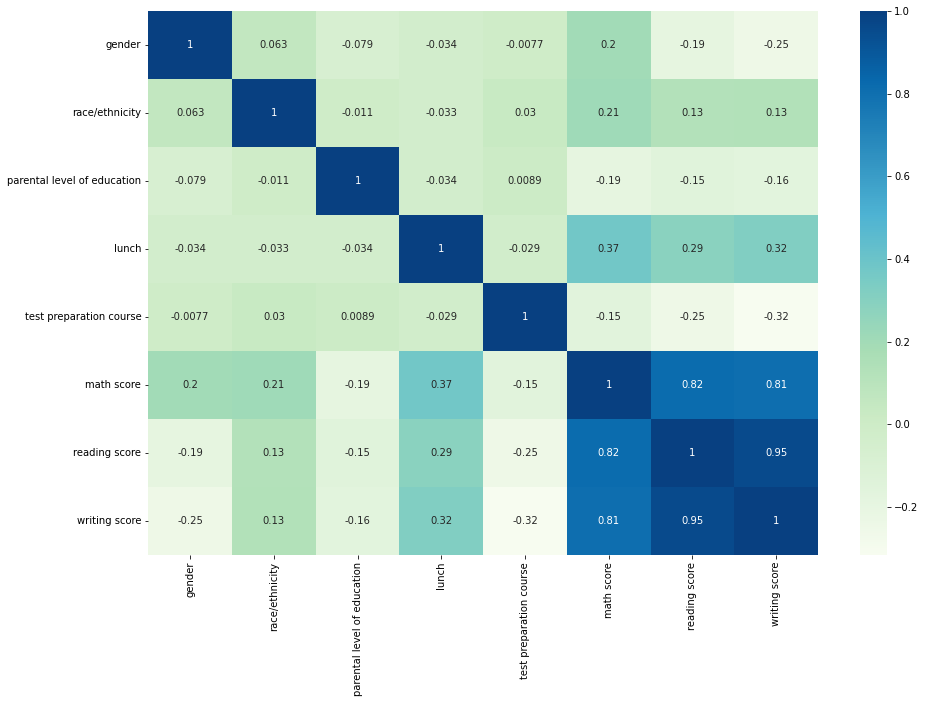

In [217]:
fig = plt.figure(figsize=(15,10))
correl = df_copy.corr()
sns.heatmap(correl, cmap="GnBu", annot=True)

In [218]:
df_copy.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68


In [219]:
#prepare dataset for analysis
df_copy["avg_score"] = df_copy[["math score", "reading score", "writing score"]].mean(axis=1)
df_copy.rename(columns={"test preparation course" : "test_prep"}, inplace = True)
df_copy.head()

,gender,race/ethnicity,parental level of education,lunch,test_prep,math score,reading score,writing score,avg_score
0,1,0,2,1,0,67,67,63,65.666667
1,0,3,5,0,1,40,59,55,51.333333
2,1,4,4,0,1,59,60,50,56.333333
3,1,1,2,1,1,77,78,68,74.333333
4,1,4,0,1,0,78,73,68,73.000000


In [220]:
anovadf = pd.DataFrame({"group1" : df_copy[(df_copy.test_prep == 1) & (df_copy.lunch == 1)]["avg_score"],
                       "group2" : df_copy[(df_copy.test_prep == 1) & (df_copy.lunch == 0)]["avg_score"],
                       "group3" : df_copy[(df_copy.test_prep == 0) & (df_copy.lunch == 1)]["avg_score"],
                       "group4" : df_copy[(df_copy.test_prep == 0) & (df_copy.lunch == 0)]["avg_score"]})

In [221]:
anovadf.fillna(0.0)

,group1,group2,group3,group4
0,0.000000,0.000000,65.666667,0.000000
1,0.000000,51.333333,0.000000,0.000000
2,0.000000,56.333333,0.000000,0.000000
3,74.333333,0.000000,0.000000,0.000000
4,0.000000,0.000000,73.000000,0.000000
...,...,...,...,...
995,69.333333,0.000000,0.000000,0.000000
996,0.000000,0.000000,0.000000,89.333333
997,0.000000,36.000000,0.000000,0.000000
998,76.333333,0.000000,0.000000,0.000000


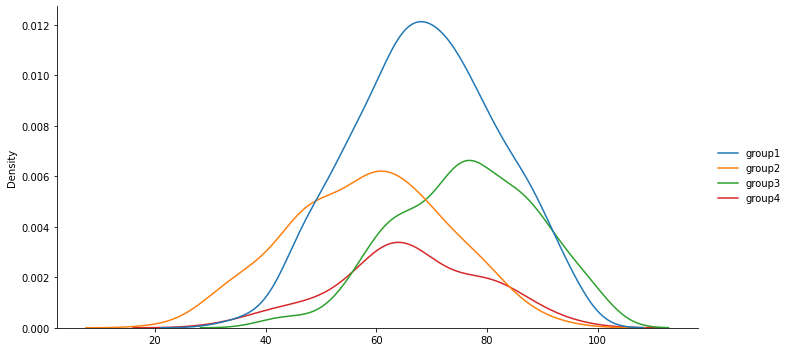

In [222]:
sns.displot(anovadf, kind= 'kde', height=5,aspect=2)

In [223]:
g1 = df_copy[(df_copy.test_prep == 1) & (df_copy.lunch == 1)]["avg_score"]
g1.reset_index(drop=True, inplace=True)
g1

0      74.333333
1      72.000000
2      61.333333
3      61.333333
4      49.000000
         ...    
422    89.333333
423    66.000000
424    56.666667
425    69.333333
426    76.333333
Name: avg_score, Length: 427, dtype: float64

In [224]:
g2 = df_copy[(df_copy.test_prep == 1) & (df_copy.lunch == 0)]["avg_score"]
g2.reset_index(drop=True, inplace=True)

g3 = df_copy[(df_copy.test_prep == 0) & (df_copy.lunch == 1)]["avg_score"]
g3.reset_index(drop=True, inplace=True)

g4 = df_copy[(df_copy.test_prep == 0) & (df_copy.lunch == 0)]["avg_score"]
g4.reset_index(drop=True, inplace=True)

## ANOVA Assumptions:
### Normality: 
To check the normality of our data, we will use Shapiro-Wilke Test. Since dataframe size is large, we reduce samples to 40 values.

In [225]:
#Normality:
from scipy import stats
def shapiro_test(x):
    a = 0.05
    test = stats.shapiro(x)
    if test.pvalue <= 0.05:
        return f'The distribution departed from normality significantly, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}'
    else:
        return f"Shapiro Wilk Test result didn't show non-normality, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}. There is no evidence to reject the null hypothesis of normality."

for i in range(4):
    print(["Group1: ","Group2: ","Group3: ", "Group4: "][i], shapiro_test([g1[:40], g2[:40], g3[:40], g4[:40]][i]))
    print('\n')

Group1:  Shapiro Wilk Test result didn't show non-normality, W= 0.96, P value= 0.23. There is no evidence to reject the null hypothesis of normality.


Group2:  Shapiro Wilk Test result didn't show non-normality, W= 0.97, P value= 0.34. There is no evidence to reject the null hypothesis of normality.


Group3:  Shapiro Wilk Test result didn't show non-normality, W= 0.97, P value= 0.35. There is no evidence to reject the null hypothesis of normality.


Group4:  Shapiro Wilk Test result didn't show non-normality, W= 0.97, P value= 0.42. There is no evidence to reject the null hypothesis of normality.




### Homogeneity: 
We can use Bartlett’s Test or Levene Test(less sensitive to non-normality) to check for equal variances among all input samples. 
Let’s take a quick look at the variances of our groups. The values are pretty close to each other

In [226]:
#Quick look at the variances
[round(np.var(x, ddof=1),3) for x in [g1, g2, g3, g4]]

[167.905, 198.204, 158.422, 178.009]

In [227]:
from scipy.stats import bartlett

alpha = 0.05
stat, p_bartlet = bartlett(g1, g2, g3, g4)

if p_bartlet <= alpha:
    print(p_bartlet,": small p-value suggests that populations do not have equal variances")
else:
    print(p_bartlet, ": large p-value suggests that our data is homogeneous")

0.3415081579599409 : large p-value suggests that our data is homogeneous


### Independent Observations: 
This assumption is based on the researcher’s knowledge and decision about the data source. We assume that nobody took test twice and conditions were equal for everybody.

Now we are confident that our data fulfilling the assumptions, we can move on to conduct an ANOVA test.

### Specifying the Null & Alternative Hypothesis

#### Null Hypothesis: 

H0: There is no statistically significant difference between the results of these four groups of students.

#### Alternative Hypothesis:

H1: There is a statistically significant difference between the performance of the students.

### Setting up an Alpha Value

alpha = 0.05

### Determining F-critical Value

F-critical is the threshold value that we will compare with our F-statistic.

To be able to determine F-critical value, we need:
alpha level,
df1 = k-1 (dfn — degrees of freedom nominator),
df2 = N-k (dfd — degrees of freedom denominator),
where k = number of the groups, N = number of total observations.
and the F distribution table (or the software). 

As it shows in the [table](http://www.socr.ucla.edu/Applets.dir/F_Table.html) at alpha=0.05, df1=3 and df2=996 the F-critical value is ~2.6049. 

In [228]:
from scipy.stats import f 
dfn = len([g1, g2, g3, g4])-1
dfd = len(anovadf) - len([g1, g2, g3, g4])
f_crit = f.ppf(1-alpha,dfn,dfd)
print(f_crit)

2.613839375021354


All ANOVA assumptions were met, so we can perform ANOVA analysis

## Calculating the Test(F) Statistic and P-value

### Quick way

In [229]:
stats.f_oneway(g1, g2, g3, g4)

F_onewayResult(statistic=70.963110979297, pvalue=1.351926016556089e-41)

### Manually

In [230]:
def func(row):
    if row["test_prep"] == 1 and row["lunch"] == 1:
        return 1
    elif row["test_prep"] == 1 and row["lunch"] == 0:
        return 2
    elif row["test_prep"] == 0 and row["lunch"] == 1:
        return 3
    else:
        return 4

In [231]:
df_copy["group"] = df_copy.apply(func, axis=1)

In [232]:
df_copy.head()

,gender,race/ethnicity,parental level of education,lunch,test_prep,math score,reading score,writing score,avg_score,group
0,1,0,2,1,0,67,67,63,65.666667,3
1,0,3,5,0,1,40,59,55,51.333333,2
2,1,4,4,0,1,59,60,50,56.333333,2
3,1,1,2,1,1,77,78,68,74.333333,1
4,1,4,0,1,0,78,73,68,73.000000,3


In [233]:
#Calculate overal mean
overal_mean = sum(df_copy.avg_score/len(anovadf))

#Calculate sums of squared mean differences for each observation in each group
ssb = []
for i in df_copy.group.unique():
    group_mean = df_copy[df_copy.group == i].avg_score.mean()
    sqr_mean_diff = (group_mean - overal_mean) ** 2
    sum_sqr = len(df_copy[df_copy.group == i]) * sqr_mean_diff
    ssb.append(sum_sqr)
#Sum of group variability of each group
SSb = sum(ssb)
print(SSb)

37061.387563257755


In [234]:
#Calculate MSb (Explained Variance)
k = len(df_copy.group.unique())
MSb = SSb/(k-1)
print(MSb)

12353.795854419252


In [235]:
#Calculate sum of the squared differences between the observations and its group variance for each group
sum_sqr_diff = []
for i in df_copy.group.unique():
    group_mean = df_copy[df_copy.group == i].avg_score.mean()
    sum_sqr = sum(list(map(lambda x: (x-group_mean)**2, df_copy[df_copy.group == i].avg_score)))
    sum_sqr_diff.append(sum_sqr)
    print(i,": "+str(sum_sqr))
#Add them together
SSw = sum(sum_sqr_diff)
print("SSw: " + str(SSw))

3 : 35486.48098765429
2 : 46974.40522875816
1 : 71527.36403851165
4 : 19402.973737373737
SSw: 173391.22399229783


In [236]:
#Calculate MSw (Unexplained Variance) 
N = len(df_copy)
MSw = SSw/(N-k)
print('MSw: ',MSw)

MSw:  174.08757428945566


In [237]:
anova_table = pd.DataFrame({"Variation Source": ["Between Groups","Erro Residual","Total"],
                  "Sums of Squares":[round(SSb,2),round(SSw,2),round(SSb+SSw,2)],
                            "Degrees of Freedom":[k-1,N-k,N-1],
                 "Mean Squares":[round(MSb,2),round(MSw,2),""]})
anova_table.set_index("Variation Source",inplace=True)
anova_table

,Sums of Squares,Degrees of Freedom,Mean Squares
Variation Source,,,
Between Groups,37061.39,3,12353.8
Erro Residual,173391.22,996,174.09
Total,210452.61,999,


In [238]:
f_stat = MSb/MSw
f_stat

70.96311097929699

In [239]:
#Find the P-value 
p_value = f.sf(f_stat, dfn, dfd) #find p-value of F test statistic
print(p_value)

1.351926016556089e-41


In [240]:
#Reject the null Hypothesis 
if (f_stat > f_crit) & (p_value < alpha):
    print(f"We reject H0 because f-statisitic {f_stat} > f-critical {f_crit} and p-value {p_value} < alpha {alpha}",
         "\nWe have significant evidence at 0.05 level the student groups are belong to different populations.")

We reject H0 because f-statisitic 70.96311097929699 > f-critical 2.613839375021354 and p-value 1.351926016556089e-41 < alpha 0.05 
We have significant evidence at 0.05 level the student groups are belong to different populations.


In [241]:

anova_table["F"] =[f_stat,"",""]
anova_table['P-Value'] = [str(p_value),"",""]
anova_table

,Sums of Squares,Degrees of Freedom,Mean Squares,F,P-Value
Variation Source,,,,,
Between Groups,37061.39,3,12353.8,70.963111,1.351926016556089e-41
Erro Residual,173391.22,996,174.09,,
Total,210452.61,999,,,


What groups have sagnificant difference - Tukey test:

In [242]:
from statsmodels. stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df_copy['avg_score'],
 groups=df_copy['group'],
 alpha= 0.05 )

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.3881   -0.0 -13.1347 -7.6415   True
     1      3   7.2539    0.0   4.4568  10.051   True
     1      4   -2.786 0.1982  -6.4165  0.8445  False
     2      3   17.642   -0.0  14.4848 20.7992   True
     2      4   7.6021    0.0   3.6875 11.5168   True
     3      4 -10.0399    0.0 -13.9901 -6.0896   True
-----------------------------------------------------
